In [25]:
import cv2
import json
import numpy as np
import os
import matplotlib.pyplot as plt
import heapq
import matplotlib.patches as patches

In [ ]:
def calculate_brightness(points, gray_image):
    pts = np.array([points], dtype=np.int32)
    mask = np.zeros_like(gray_image)
    cv2.fillPoly(mask, pts, 255)
    brightness = cv2.mean(gray_image, mask=mask)[0]
    
    return brightness


file_paths = [
    "/data/ephemeral/home/repo/code/data/chinese_receipt", 
    "/data/ephemeral/home/repo/code/data/japanese_receipt", 
    "/data/ephemeral/home/repo/code/data/thai_receipt", 
    "/data/ephemeral/home/repo/code/data/vietnamese_receipt"
]

brightness_info = []
brightness_collection = [[], [], [], []]
lowest_collection = [[], [], [], []]
highest_collection = [[], [], [], []]

lowest = [300, 300, 300]
highest = [0, 0, 0]

for i, file_path in enumerate(file_paths):

    with open(os.path.join(file_path, "ufo", "train.json"), "r") as f:
        data = json.load(f)
        img_path_list = list(data['images'].keys())
        
        # 각 이미지 처리
        for img_path in img_path_list:
            # 이미지 파일 읽기
            image = cv2.imread(os.path.join(file_path, "img/train", img_path))
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            # 단어 객체에 접근하여 bounding box 좌표와 명도 계산
            for word_id, word_info in data['images'][img_path]["words"].items():
                transcription = word_info["transcription"]
                points = word_info["points"]
                
                # 명도 계산
                brightness = calculate_brightness(points, gray_image)
                '''if highest[0] < brightness:
                    highest.insert(0, ())
                if len(highest) > 3:
                    highest.pop(2)

                if lowest[0] > brightness:
                    lowest.insert(0, f)
                if len(lowest) > 3:
                    lowest.pop(2)'''
                
                # 이미지의 bounding box 명도 정보를 리스트에 추가
                brightness_info.append(brightness)
                brightness_collection[i].append(brightness)

                heapq.heappush(lowest_collection[i], (brightness, img_path, points))
                heapq.heappush(highest_collection[i], (-brightness, img_path, points))
    

    

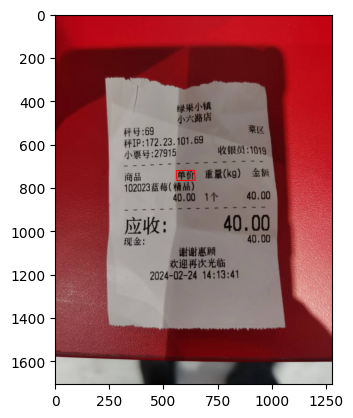

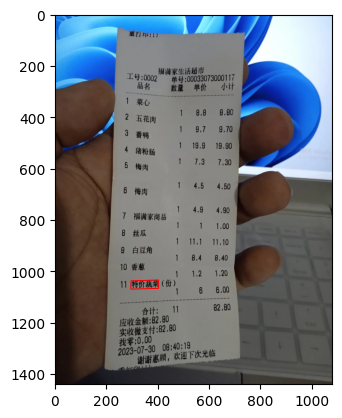

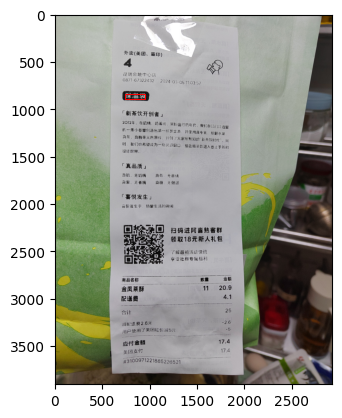

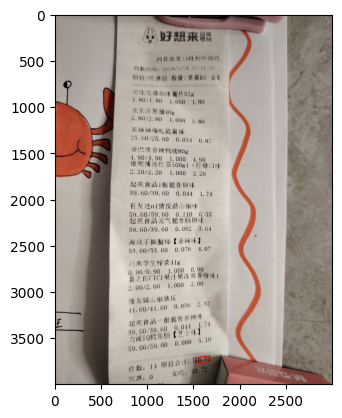

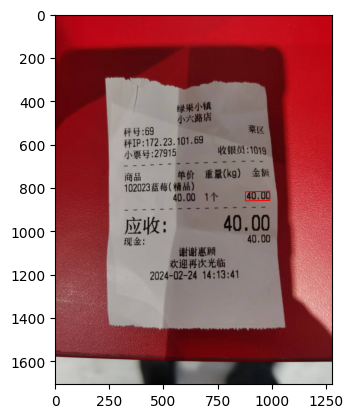

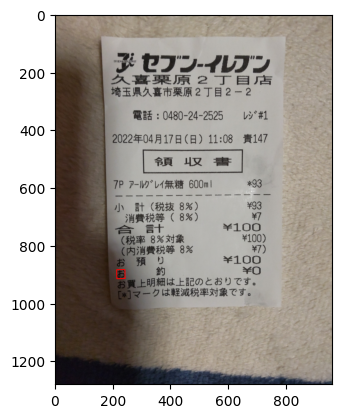

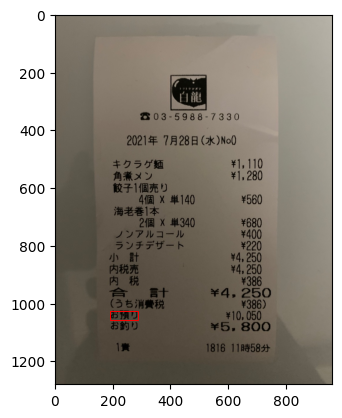

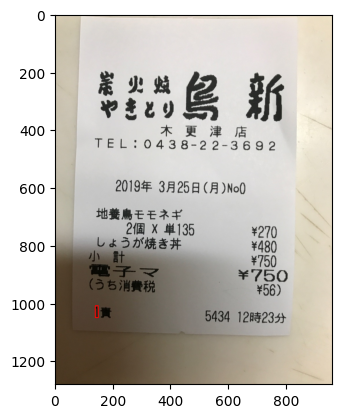

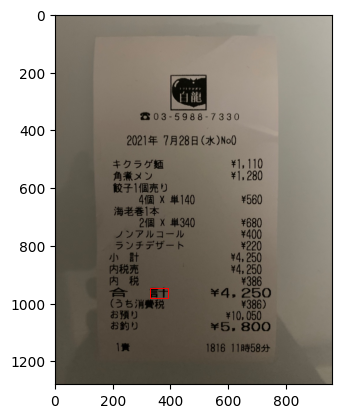

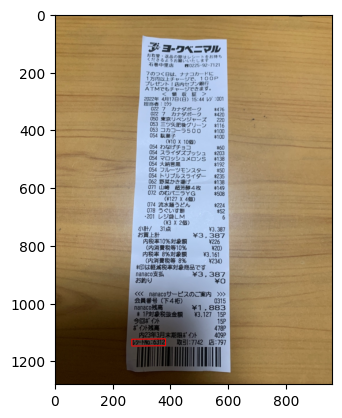

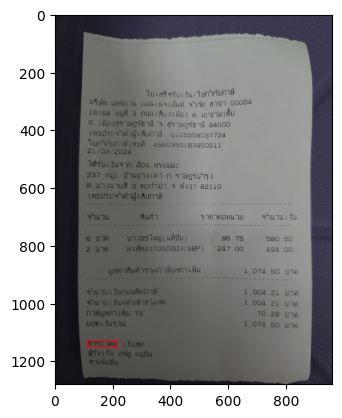

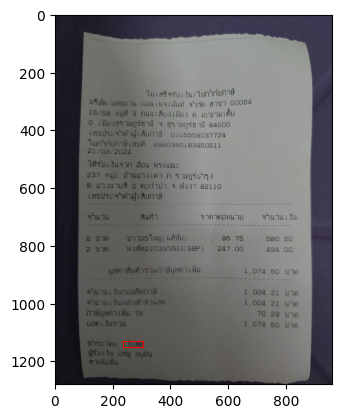

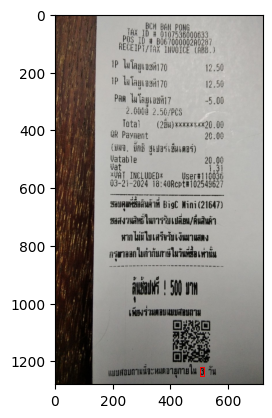

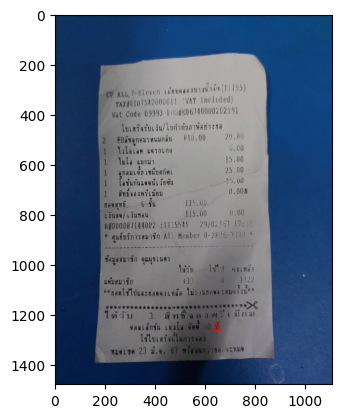

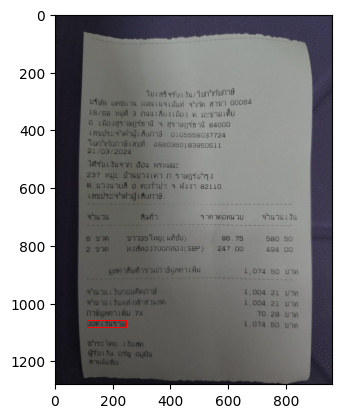

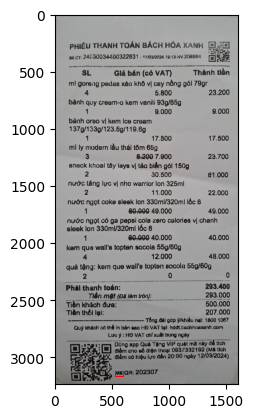

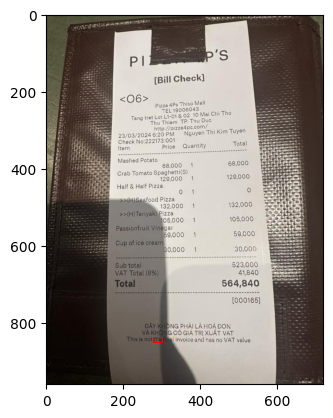

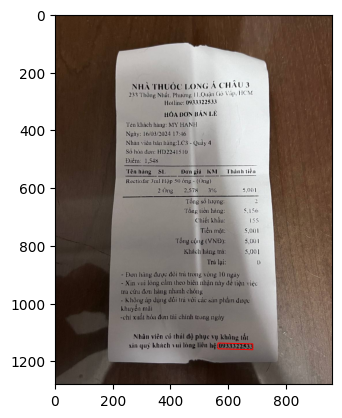

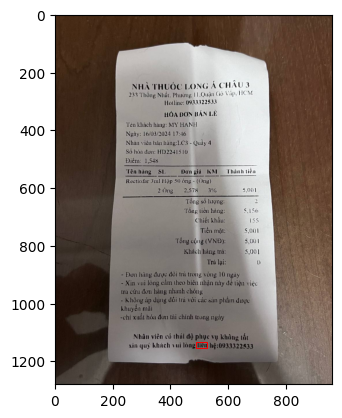

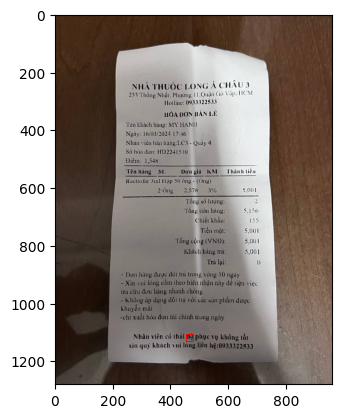

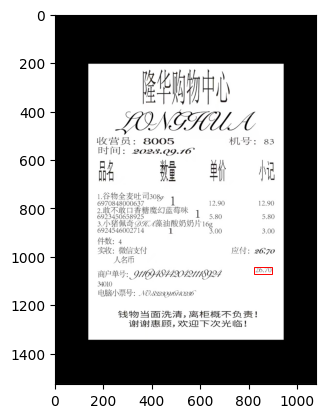

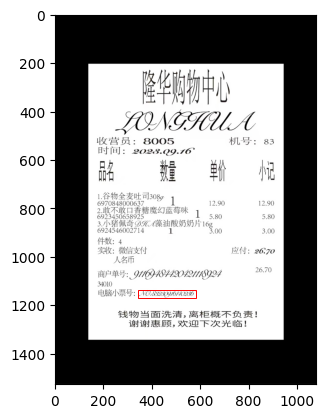

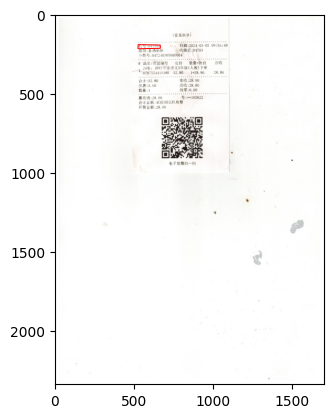

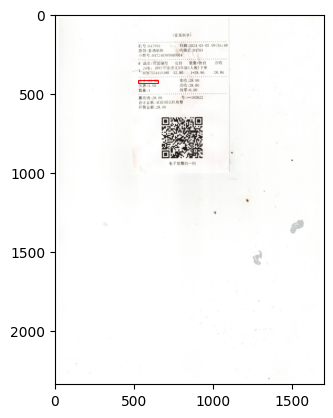

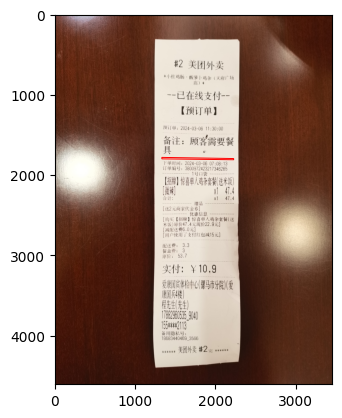

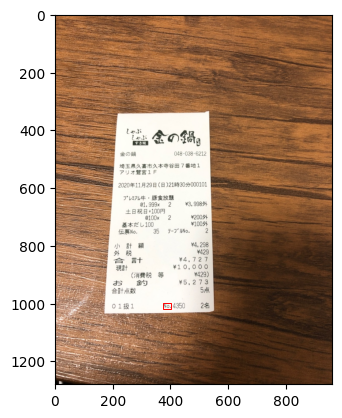

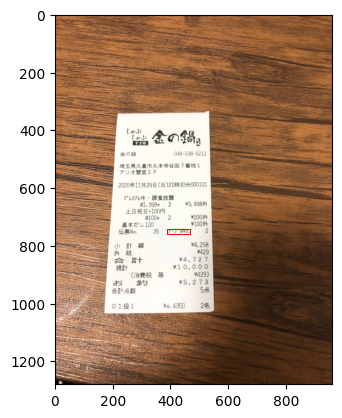

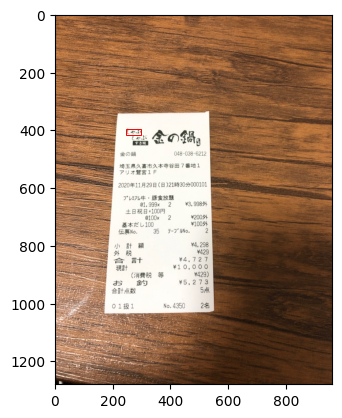

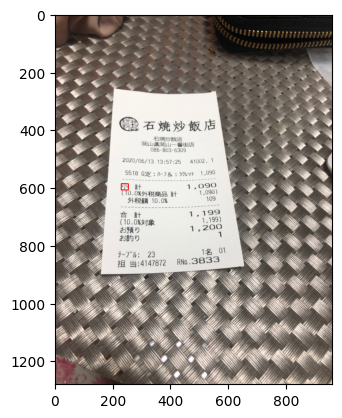

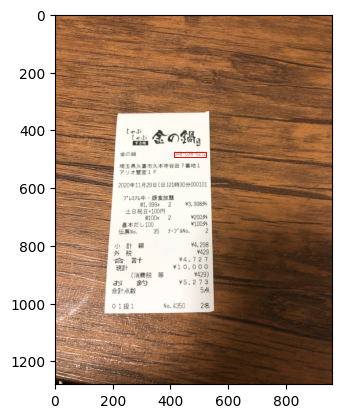

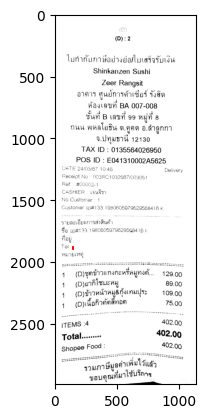

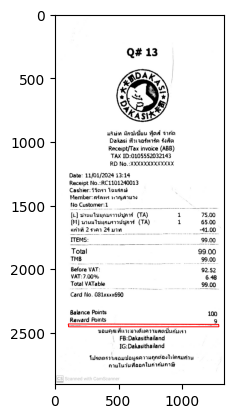

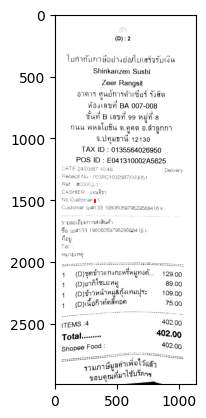

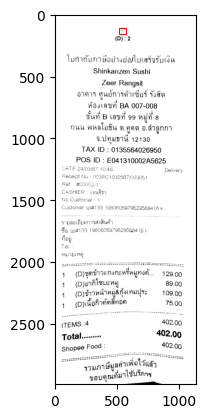

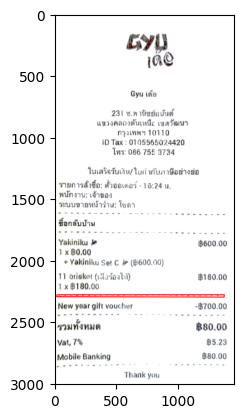

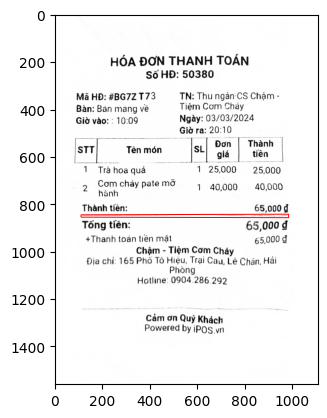

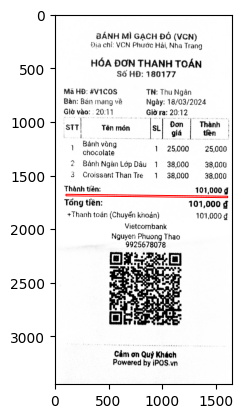

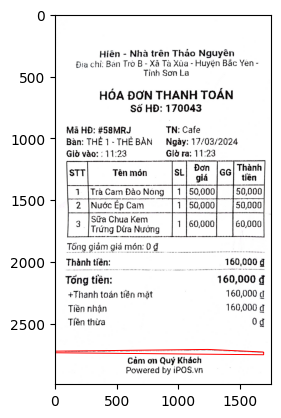

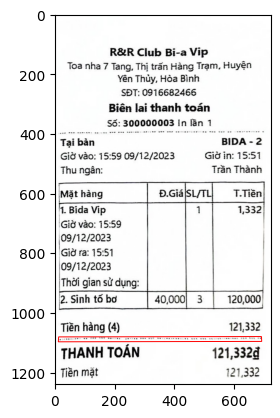

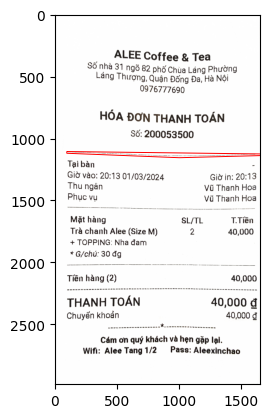

In [31]:
# new_data 폴더 필수!!

for i in range(4): # 언어별 OCR json 파일
    for j in range(5): # 이미지 어노테이션 5개 출력
        _, path, points = heapq.heappop(lowest_collection[i])
        a = cv2.imread(os.path.join(file_paths[i], "img/train", path))
        image_rgb = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
        fig, ax = plt.subplots()
        ax.imshow(image_rgb)

        # 다각형 (네 꼭짓점) 그리기
        polygon = patches.Polygon(points, linewidth=0.7, edgecolor='r', facecolor='none')
        ax.add_patch(polygon)

        plt.show()  

for i in range(4): # 언어별 OCR json 파일
    for j in range(5): # 이미지 어노테이션 5개 출력
        _, path, points = heapq.heappop(highest_collection[i])
        a = cv2.imread(os.path.join(file_paths[i], "img/train", path))
        image_rgb = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
        fig, ax = plt.subplots()
        ax.imshow(image_rgb)

        # 다각형 (네 꼭짓점) 그리기
        polygon = patches.Polygon(points, linewidth=0.7, edgecolor='r', facecolor='none')
        ax.add_patch(polygon)

        plt.show()  

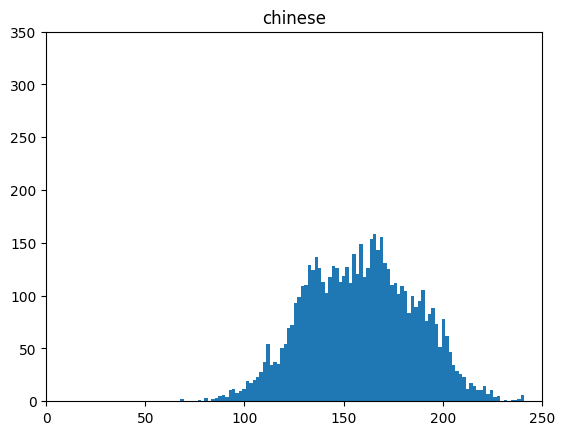

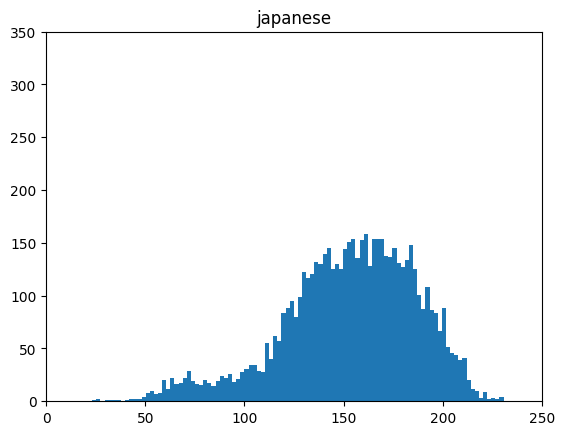

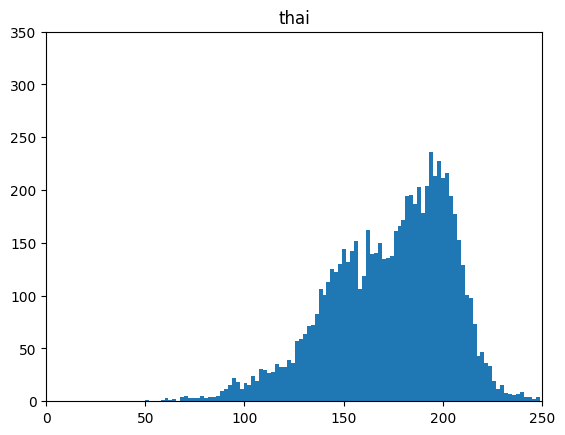

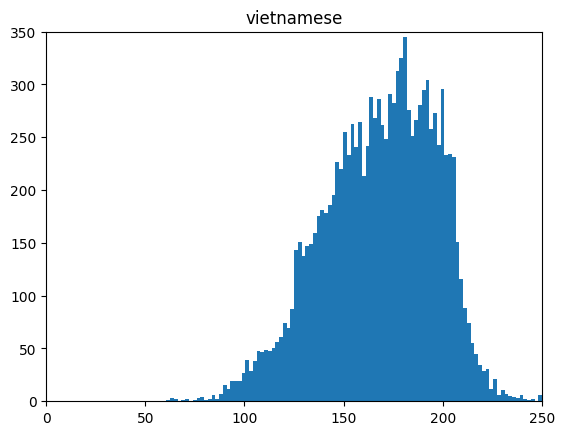

In [9]:
titles = ["chinese", "japanese", "thai", "vietnamese"]

for i in range(4):
    plt.hist(brightness_collection[i], bins=100)
    plt.title(titles[i])
    plt.xlim(0, 250)
    plt.ylim(0, 350)
    plt.show()